In [169]:
import pandas as pd
import numpy as np
import tqdm
import random
from scipy.stats import rankdata
from scipy.stats import fisher_exact

import blitzgsea as blitz

In [176]:
def rel_score(enrichment_ranks, relevance_ranks):
    enrichment_ranks["RANK"] = 1-rankdata(enrichment_ranks.loc[:,"pval"], method='max')/enrichment_ranks.shape[0]
    inter = enrichment_ranks.index.intersection(relevance_ranks.index)
    if len(inter) == 0:
        raise Exception("gene set identifier are not matching")
    return np.sum(enrichment_ranks.loc[inter,"RANK"]*relevance_ranks.loc[inter, "REL.SCORE"])

def rel_score2(enrichment_ranks, relevance_ranks):
    enrich_rand = pd.DataFrame(enrichment_ranks)
    enrich_rand.loc[:,"nes"] = random.sample(list(enrich_rand.loc[:, "nes"]), result.shape[0])
    enrichment_ranks["RANK"] = abs(enrichment_ranks.loc[:,"nes"])
    inter = enrichment_ranks.index.intersection(relevance_ranks.index)
    if len(inter) == 0:
        raise Exception("gene set identifier are not matching")
    return np.sum(enrichment_ranks.loc[inter,"RANK"]*relevance_ranks.loc[inter, "REL.SCORE"])

with open('data/kegg.gmt', 'r') as file:
    kegg = {line.split('\t')[0]: [item.rstrip() for item in line.split('\t')[2:]] for line in file}

mapping = pd.read_csv("data/d2d_map.txt", sep=" ", header=None, index_col=0)


In [76]:
import urllib.request
import pandas as pd

# download example gene expression signature
url = "https://github.com/MaayanLab/blitzgsea/raw/main/testing/ageing_muscle_gtex.tsv"
urllib.request.urlretrieve(url, "ageing_muscle_gtex.tsv")

# read signature as pandas dataframe
signature = pd.read_csv("ageing_muscle_gtex.tsv")


In [209]:
scores = []
rand_scores = []
mm_names = []
for i in mapping.index:
    rscore = []
    mm = np.array(mapping.loc[i,:])[0]
    mm_names.append(i+"-"+mm)
    rel_ranks = pd.read_csv("data/mala/"+mm+".txt", sep="\t", index_col=0)
    diff = pd.read_csv("data/limma/"+i+".tsv", sep="\t", index_col=0)
    dd = diff["limma.STAT"].reset_index().sort_values("limma.STAT")
    dd.columns = [0,1]
    result = blitz.gsea(dd, kegg)
    scores.append(int(rel_score2(result, rel_ranks)))
    for k in range(100):
        rdata = pd.DataFrame(np.random.rand(result.shape[0]), index=result.index, columns=["nes"])
        rscore.append(int(rel_score2(rdata, rel_ranks)))
    rand_scores.append(rscore)

In [151]:
result.to_csv("alz_gsea.tsv", sep="\t")

In [192]:
print(scores, int(np.mean(rand_scores)), int(np.std(rand_scores)))

[1952] 650 63


Text(0, 0.5, 'relevance')

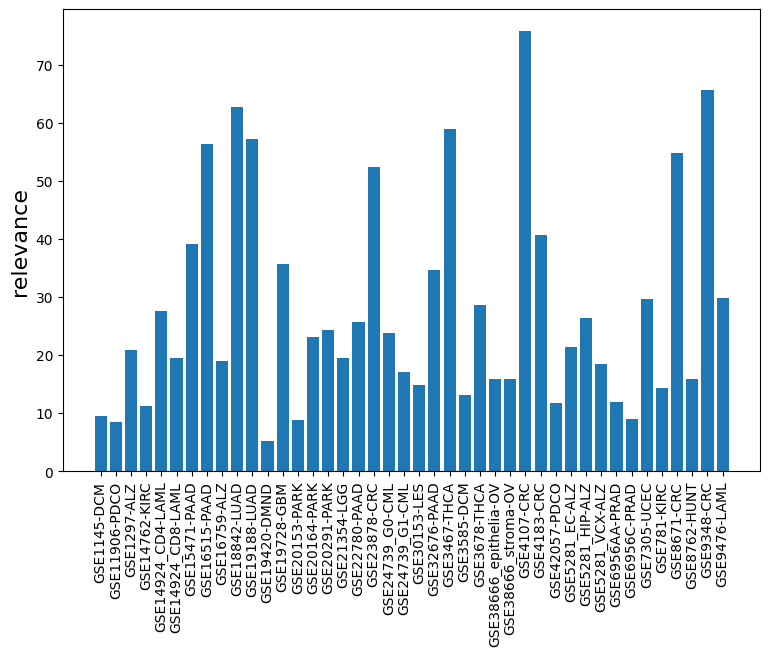

In [212]:
mr = np.mean(rand_scores, axis=1)
msd = np.std(rand_scores, axis=1)

plt.figure(figsize=(9,6))
plt.bar(range(len(msd)), (scores-mr)/msd)
plt.xticks(range(len(scores)), mm_names, rotation=90)
plt.ylabel("relevance", fontsize=16)


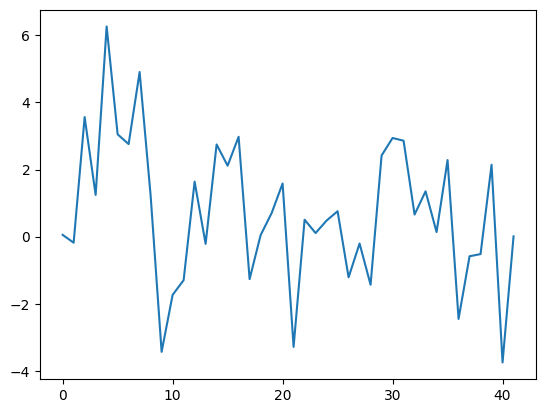

In [141]:
from matplotlib import pyplot as plt
#plt.plot(scores - np.mean(rand_scores, axis=1))
plt.plot((scores - np.mean(rand_scores, axis=1))/np.std(rand_scores, axis=1))

In [106]:
str(mapping.loc[i,:]).split("\n")[0]

'1    ALZ'

In [111]:
mapping.loc["GSE1145",:]

1    DCM
Name: GSE1145, dtype: object

In [99]:
rel_ranks = pd.read_csv("data/mala/alz.txt", sep="\t", index_col=0)

In [154]:
result

,es,nes,pval,sidak,fdr,geneset_size,leading_edge,RANK
Term,,,,,,,,
hsa05012,-0.604906,-10.196160,2.062681e-24,7.116249e-22,7.116249e-22,225,"PSMD2,PSMA3,SEPTIN5,NDUFA7,ITPR1,TRAP1,NDUFA5,...",0.997101
hsa05020,-0.577537,-9.964828,2.172502e-23,7.495131e-21,3.747565e-21,235,"PSMD2,PSMA3,NDUFA7,ITPR1,NDUFA5,NDUFV1,PSMA1,M...",0.994203
hsa05016,-0.547927,-9.660392,4.441627e-22,1.532361e-19,5.107871e-20,260,"PSMA3,NDUFA7,ITPR1,NDUFA5,PSMA1,MAPK10,NDUFS8,...",0.991304
hsa05014,-0.495776,-8.601162,7.891328e-18,2.722508e-15,6.806271e-16,302,"PSMD2,PSMA3,SRSF7,NDUFA7,NDUFA5,NDUFV1,PSMA1,N...",0.988406
hsa00190,-0.701685,-8.563197,1.097803e-17,3.787421e-15,7.574841e-16,106,"NDUFA7,NDUFA5,NDUFS8,NDUFB11,ATP5PO,NDUFB2,COX...",0.985507
...,...,...,...,...,...,...,...,...
hsa05213,0.132122,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,56,"TCF7L2,CTNNA3,LEF1,APC2,TP53,MYC,CASP9,MAPK3,A...",0.000000
hsa04510,0.151362,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,193,"LAMA4,COL6A2,COL6A3,MYLK,FLNC,ITGB8,LAMB2,FLT4...",0.000000
hsa04371,0.129976,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,120,"PIK3C3,MYL4,MYL2,PIK3R5,MYLK,SERPINE1,AGTR1,NR...",0.000000


In [42]:
eranks = pd.read_csv("data/alz_test_ora.tsv", sep="\t", index_col=0)
rel_ranks = pd.read_csv("data/mala/alz.txt", sep="\t", index_col=0)

pd.read_csv("data/d2d_map.txt", sep="\t")


In [47]:
rel_score(eranks, rel_ranks)

NR.GENES        43.000000
NR.SIG.GENES     8.000000
PVAL             0.716000
RANK             0.401163
Name: hsa04930, dtype: float64
57


826.3440406976745

In [ ]:

rel_ranks